In [1]:
import lichess.api
from pprint import pprint
from datetime import datetime
import os

import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

# working dir should be chessanalytics/src when the notebook starts
while(not os.getcwd().endswith('chess-analytics')):
    os.chdir('..')
print('Working dir: ' + os.getcwd())

name = 'carequinha'
user = lichess.api.user(name)

Working dir: /home/jorge/GIT/chess-analytics


In [2]:
# %reload_ext autoreload
# %autoreload 2

In [3]:
from src.game import ChessGame
from src.get_games import download_games
# download_games('carequinha',
#                         is_rated=True)
# download games if they don't exist
# games = load_games('resources/PGN_database')
games = ChessGame.load_pgn_file('src/resources/carequinha.pgn')

In [4]:
i=5000
print(len(games))

print(games[i].__str__())
print(games[i].result)
print(games[i].get_result(name))
print(list(map(lambda value: value.name, games[i].players.values())))

a = games[i].moves

print(a)
print(a[0::2])
print(games[i].clocks)

6376
Standard game between carequinha (1877) and mattaiah (1712).
This game's time control was 180+0 was played in 2019.07.19. The result was 0-1.
The oppening code is D10 and the game had a length of 48 moves.
0-1
LOSS
['carequinha', 'mattaiah']
['d4', 'd5', 'c4', 'dxc4', 'Nc3', 'c6', 'a4', 'e5', 'dxe5', 'Qxd1+', 'Kxd1', 'a6', 'e4', 'Be6', 'Nf3', 'Nd7', 'Ng5', 'Nxe5', 'Nxe6', 'fxe6', 'f4', 'Ng4', 'Ke1', 'Bb4', 'Bxc4', 'Bxc3+', 'bxc3', 'N8f6', 'h3', 'Nh6', 'e5', 'Ne4', 'Bb2', 'O-O-O', 'Bxe6+', 'Kb8', 'g4', 'Rd3', 'Ba3', 'Rhd8', 'Be7', 'Re3+', 'Kf1', 'Rd2', 'Bd6+', 'Ka8', 'Rg1', 'Rf2#']
['d4', 'c4', 'Nc3', 'a4', 'dxe5', 'Kxd1', 'e4', 'Nf3', 'Ng5', 'Nxe6', 'f4', 'Ke1', 'Bxc4', 'bxc3', 'h3', 'e5', 'Bb2', 'Bxe6+', 'g4', 'Ba3', 'Be7', 'Kf1', 'Bd6+', 'Rg1']
[180.0, 180.0, 180.0, 179.0, 178.0, 178.0, 177.0, 175.0, 174.0, 173.0, 174.0, 167.0, 168.0, 164.0, 166.0, 159.0, 163.0, 155.0, 162.0, 154.0, 161.0, 148.0, 160.0, 135.0, 158.0, 132.0, 157.0, 126.0, 148.0, 114.0, 133.0, 113.0, 128.0, 110.0,

In [ ]:
hours = list(map(lambda game: game.utctime.split(':')[0], games))
data_list = list(map(lambda s: int(s), hours))
list_set = set(data_list)
list_set.add(max(list_set)+1)
plt.hist(data_list, bins = list(list_set), edgecolor='blue')
plt.show()

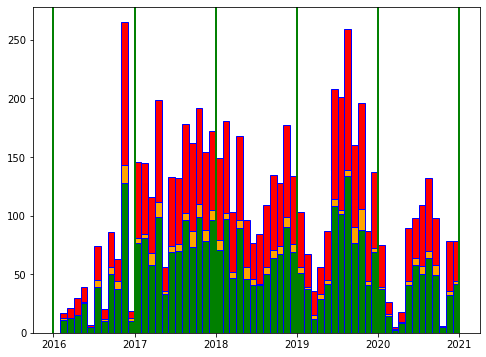

In [93]:
def get_result_list(game_list):
    list_result = list(map(lambda game: game.get_result(name), game_list))
    return {el: list_result.count(el) for el in set(list_result)}

def parse_time(game):
    year = game.date.split('.')[0]
    month = game.date.split('.')[1]
    return int(year) + int(month)/12

def plot_histogram(data_list, bin_list = None, color = 'green'):
    if bin_list == None:
        bin_list = list(set(data_list))
        bin_list.sort()
        bin_list.append(2*bin_list[-1] - bin_list[-2])
    vertical_lines = set([int(i) for i in bin_list])
    plt.hist(data_list, bins = bin_list, edgecolor='blue', color=color)
    for line in vertical_lines:
        plt.axvline(x=line, color='green')
    return None

def accummulator_list(base_list):
    accum_list = []
    partial_list = []
    for l in data_list:
        accum_list = accum_list + l
    partial_list.append(accum_list)
    return partial_list
    
results = ['WIN','DRAW','LOSS']
colors = ['green','orange','red']

split_game_list = [list(filter(lambda game: game.get_result(name) == el, games)) for el in results]
data_list = list(map(lambda game_list: list(map(lambda game: parse_time(game),game_list)),split_game_list))

data = accummulator_list(data_list)

grouped_plot_properties = [[x,y] for x,y in zip(partial_list, colors)]
grouped_plot_properties.reverse()

plt.figure(figsize=(8,6))
for data, color in grouped_plot_properties:
    plot_histogram(data, bin_list = None, color = color)
plt.show()

In [169]:
from functools import reduce
def split_list(pattern, base_list):
    values = set([pattern(el) for el in base_list])
    return [[y for y in base_list if pattern(y) == x]for x in values]

def count(pattern, base_list):
    splited_list = split_list((lambda game: pattern(game)), base_list)
    return {pattern(sublist[0]): len(sublist) for sublist in splited_list}

def proportion(a_list, b_list):
    return [float(x)/float(y) for x,y in zip(a_list,b_list)]

def merge_dict(pattern, dict1, dict2):
    dict3 = {**dict1, **dict2}
    for k, v in dict3.items():
        if k in dict1 and k in dict2:
            dict3[k] = pattern(dict1[k], dict2[k])
            
split_game_list = {el: list(filter(lambda game: game.get_result(name) == el, games)) for el in results}
game_counts_list = {k: count(parse_time, l) for (k,l) in split_game_list.items()}

print(game_counts_list)
print(game_counts_list['WIN'])
totals = list(reduce(lambda list_a,list_b : [x+y for x,y in zip(list_a,list_b)] ,game_counts_list))

game_proportion_list = [proportion(l, totals) for l in game_counts_list]
x_data_list = list(set([parse_time(el) for el in l]) for (k,l) in split_game_list.items())
#print(game_proportion_list)
#total_split_count = count(parse_time, games)
#split_win_count = count(parse_time, list_won_games)
#split_windraw_count = count(parse_time, list_wondraw_games)

#total_proportion_list = proportion(split_count,split_count)
#win_proportion_list = proportion(split_win_count,split_count)
#windraw_proportion_list = proportion(split_windraw_count,split_count)
print(len(x_data_list))
for i in range(len(x_data_list)):
    print("game_list length: ", len(game_proportion_list[i]))
    print("x_data length: ", len(x_data_list[i]))
plt.figure(figsize=(8,6))
for lst, x_el in zip(game_proportion_list,x_data_list):
    plt.bar(list(x_el), lst, width=1/12, color = 'red')
#plt.bar(x_data, game_proportion_list[0], width=1/12, color = 'red')
#plt.bar(x_data, windraw_proportion_list, width=1/12, color = 'orange')
#plt.bar(x_data, win_proportion_list, width=1/12, color = 'green')
plt.axhline(y=0.5, color='blue')
plt.show()

{'WIN': {2020.3333333333333: 41, 2020.4166666666667: 58, 2020.5: 50, 2020.5833333333333: 64, 2020.6666666666667: 49, 2020.75: 5, 2020.8333333333333: 32, 2020.9166666666667: 42, 2016.9166666666667: 10, 2017.0833333333333: 81, 2017.1666666666667: 58, 2017.25: 99, 2017.5: 70, 2017.5833333333333: 96, 2017.6666666666667: 73, 2017.75: 99, 2017.4166666666667: 69, 2017.3333333333333: 33, 2017.8333333333333: 78, 2018.0833333333333: 97, 2018.1666666666667: 47, 2018.25: 89, 2018.3333333333333: 46, 2018.4166666666667: 41, 2019.0833333333333: 37, 2019.1666666666667: 12, 2019.25: 29, 2019.3333333333333: 42, 2019.4166666666667: 108, 2020.0: 37, 2020.0833333333333: 14, 2017.9166666666667: 96, 2020.1666666666667: 2, 2020.25: 8, 2018.5: 41, 2018.5833333333333: 50, 2018.6666666666667: 64, 2018.75: 67, 2018.8333333333333: 90, 2018.9166666666667: 69, 2016.0833333333333: 11, 2016.1666666666667: 13, 2016.25: 15, 2016.4166666666667: 5, 2016.3333333333333: 25, 2016.5: 39, 2016.5833333333333: 10, 2016.666666666

ValueError: could not convert string to float: 'W'

In [ ]:
import chess
def print_board_at_move(move_list,
                        move_num: int,
                        player: str):
#move_list = (games[1]['moves'].split())
#move_num = 2
#player = 'black'#'white'
    board = chess.Board()
    board.reset()
    if player is 'white' or player is 'w':
        player_move = 0
    elif player is 'black' or player is 'b':
        player_move = 1
    else:
        raise Exception('No proper input for player.')
    for index in range(2*(move_num-1) + player_move):
        move = move_list.pop(0)
        board.push_san(move)
    return board

In [ ]:
board = print_board_at_move(move_list = (games[0].moves), move_num = 1, player = 'b')
board

In [ ]:
from matplotlib.pyplot import plot
plot([0,1],[0,2])
print(len(games))